In [1]:
import warnings
warnings.simplefilter(action='ignore',)

import multiprocessing
import multiprocessing as mp
from multiprocessing import Queue
print("Number of cpu : ", multiprocessing.cpu_count())

Number of cpu :  12


In [2]:
from qiskit import Aer, QuantumCircuit
from qiskit.utils import QuantumInstance
from qiskit.circuit import ParameterVector
from qiskit_machine_learning.kernels import QuantumKernel
quantum_instance = QuantumInstance(Aer.get_backend('statevector_simulator'), shots=128)

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
from time import time

import seaborn as sns
from sklearn import datasets
from sklearn.svm import SVC
sns.set_style("darkgrid")

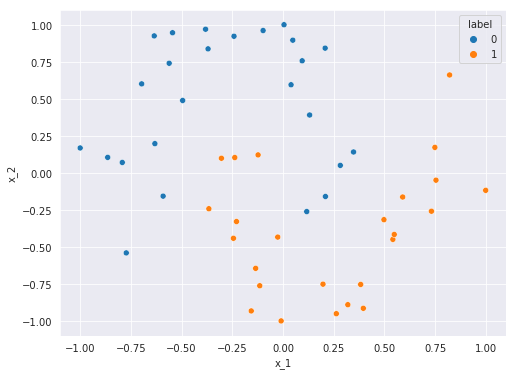

In [4]:
X,y = datasets.make_moons(n_samples=50, noise=0.2, random_state=10)

from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, random_state = 10,test_size=1/5)

plt.figure(figsize=(8,6))
data_df = pd.DataFrame(dict(x_1=X[:,0], x_2=X[:,1], label=y))
sns.scatterplot('x_1', 'x_2', data=data_df, hue='label')
plt.show()

##### Circuit generate

In [5]:
def generate_circuit_2local(genes, qubit, parameter):
    i, q = 0, 0
    qc_r, qc_h, qc_cnot = 0, 0, 0
    qc = QuantumCircuit(qubit)
    p = ParameterVector('p', parameter)
    
    for i in range(parameter): qc.rz(0*p[i],i % qubit)   

    for gene in genes:   
        if gene[0] == 0 and gene[1] == 0 and gene[2] == 0:
            qc.h(q % qubit)
            qc_h+=1

        elif gene[0] == 0 and gene[1] == 0 and gene[2] == 1:
            qc.cx(q % qubit, (q+1) % qubit)
            qc_cnot+=1

        elif gene[0] == 1 and gene[1] == 0 and gene[2] == 1:
            if gene[3] == 0 and gene[4] == 0 and gene[5] == 0: 
                qc.rx(np.pi*p[i % parameter], q % qubit)
                i+=1
                qc_r+=1
            if gene[3] == 0 and gene[4] == 0 and gene[5] == 1: 
                qc.rx((7*np.pi/8)*p[i % parameter], q % qubit)
                i+=1
                qc_r+=1
            if gene[3] == 0 and gene[4] == 1 and gene[5] == 0:
                qc.rx((3*np.pi/4)*p[i % parameter], q % qubit)
                i+=1
                qc_r+=1
            if gene[3] == 0 and gene[4] == 1 and gene[5] == 1: 
                qc.rx((5*np.pi/8)*p[i % parameter], q % qubit)
                i+=1
                qc_r+=1
            if gene[3] == 1 and gene[4] == 0 and gene[5] == 0:
                qc.rx((np.pi/2)*p[i % parameter], q % qubit)
                i+=1
                qc_r+=1
            if gene[3] == 1 and gene[4] == 0 and gene[5] == 1: 
                qc.rx((3*np.pi/8)*p[i % parameter], q % qubit)
                i+=1
                qc_r+=1
            if gene[3] == 1 and gene[4] == 1 and gene[5] == 0: 
                qc.rx((np.pi/4)*p[i % parameter], q % qubit)
                i+=1
                qc_r+=1
            if gene[3] == 1 and gene[4] == 1 and gene[5] == 1: 
                qc.rx((np.pi/8)*p[i % parameter], q % qubit)
                i+=1
                qc_r+=1
        elif gene[0] == 1 and gene[1] == 1 and gene[2] == 0:
            if gene[3] == 0 and gene[4] == 0 and gene[5] == 0: 
                qc.ry(np.pi*p[i % parameter], q % qubit)
                i+=1
                qc_r+=1
            if gene[3] == 0 and gene[4] == 0 and gene[5] == 1: 
                qc.ry((7*np.pi/8)*p[i % parameter], q % qubit)
                i+=1
                qc_r+=1
            if gene[3] == 0 and gene[4] == 1 and gene[5] == 0:
                qc.ry((3*np.pi/4)*p[i % parameter], q % qubit)
                i+=1
                qc_r+=1
            if gene[3] == 0 and gene[4] == 1 and gene[5] == 1: 
                qc.ry((5*np.pi/8)*p[i % parameter], q % qubit)
                i+=1
                qc_r+=1
            if gene[3] == 1 and gene[4] == 0 and gene[5] == 0:
                qc.ry((np.pi/2)*p[i % parameter], q % qubit)
                i+=1
                qc_r+=1
            if gene[3] == 1 and gene[4] == 0 and gene[5] == 1: 
                qc.ry((3*np.pi/8)*p[i % parameter], q % qubit)
                i+=1
                qc_r+=1
            if gene[3] == 1 and gene[4] == 1 and gene[5] == 0: 
                qc.ry((np.pi/4)*p[i % parameter], q % qubit)
                i+=1
                qc_r+=1
            if gene[3] == 1 and gene[4] == 1 and gene[5] == 1: 
                qc.ry((np.pi/8)*p[i % parameter], q % qubit)
                i+=1
                qc_r+=1

        elif gene[0] == 1 and gene[1] == 1 and gene[2] == 1:
            if gene[3] == 0 and gene[4] == 0 and gene[5] == 0: 
                qc.rz(np.pi*p[i % parameter], q % qubit)
                i+=1
                qc_r+=1
            if gene[3] == 0 and gene[4] == 0 and gene[5] == 1: 
                qc.rz((7*np.pi/8)*p[i % parameter], q % qubit)
                i+=1
                qc_r+=1
            if gene[3] == 0 and gene[4] == 1 and gene[5] == 0:
                qc.rz((3*np.pi/4)*p[i % parameter], q % qubit)
                i+=1
                qc_r+=1
            if gene[3] == 0 and gene[4] == 1 and gene[5] == 1: 
                qc.rz((5*np.pi/8)*p[i % parameter], q % qubit)
                i+=1
                qc_r+=1
            if gene[3] == 1 and gene[4] == 0 and gene[5] == 0:
                qc.rz((np.pi/2)*p[i % parameter], q % qubit)
                i+=1
                qc_r+=1
            if gene[3] == 1 and gene[4] == 0 and gene[5] == 1: 
                qc.rz((3*np.pi/8)*p[i % parameter], q % qubit)
                i+=1
                qc_r+=1
            if gene[3] == 1 and gene[4] == 1 and gene[5] == 0: 
                qc.rz((np.pi/4)*p[i % parameter], q % qubit)
                i+=1
                qc_r+=1
            if gene[3] == 1 and gene[4] == 1 and gene[5] == 1: 
                qc.rz((np.pi/8)*p[i % parameter], q % qubit)
                i+=1
                qc_r+=1
        q+=1
    return qc, qc_r, qc_h, qc_cnot


##### Parameters

In [6]:
MODE = "2local" 
QUBIT = 2
FEATURE = 2

BIT = 6
GENE = 8
POPULATION = multiprocessing.cpu_count() # 12

POOLSIZE = 4
OFFSPRINGSIZE = POPULATION - POOLSIZE
PROB = 8
MUTATION_PROB = PROB/GENE

GENERATION = 100
EARLYSTOP = 10

##### Multi-objective fitness function


In [7]:
W = 20

def cost_func(acc, r, h, cnot, swap=0):
    
    if acc == 0.0: acc = 0.01
    gate_cost = r + 2*h + 5*cnot+11*swap
    fit = gate_cost + W / acc**2 - W
    return round(fit,1)

def cost_gate(r,h,cnot,swap=0): return r+2*h+5*cnot+11*swap

In [8]:
def task(i, pop, q, mode):
    if mode == "2local": qc_i, r_i, h_i, cnot_i = generate_circuit_2local(pop[i], QUBIT, FEATURE)
    kernel = QuantumKernel(feature_map=qc_i, quantum_instance=quantum_instance,)
    model = SVC(kernel=kernel.evaluate)
    model.fit(train_x, train_y)
    score = model.score(test_x, test_y)
    if mode == "2local": q.put([score, r_i, h_i, cnot_i])

In [9]:
def calculate_fitness(pop, population, train_x, train_y, test_x, test_y):
    FITNESS = []
    SCORE, ONE, TWO = [], [], []

    for i in range(population):
        qc_i, one_i, two_i = generate_circuit(pop[i], QUBIT, FEATURE)
        kernel = QuantumKernel(feature_map=qc_i, quantum_instance=quantum_instance,)
        model = SVC(kernel=kernel.evaluate)
        model.fit(train_x, train_y)
        score = model.score(test_x, test_y)
        
        SCORE.append(score)
        ONE.append(one_i)
        TWO.append(two_i)

    for i in range(population):
        fit = cost_func(SCORE[i], ONE[i], TWO[i])
        FITNESS.append(fit)
    
    return SCORE, FITNESS

#### Genetic Algorithm


Generation: 1 , Cost: 31.55 , Time: 6.76 s
Accuracy: [0.7, 0.6, 0.6, 0.8, 0.7, 0.8, 0.8, 0.7, 0.8, 0.5, 0.8, 0.5]
Fitness: [23.8, 46.6, 39.6, 16.2, 29.8, 24.2, 21.2, 27.8, 24.2, 69.0, 19.2, 67.0]

Generation: 2 , Cost: 20.1 , Time: 13.36 s
Accuracy: [0.8, 0.8, 0.8, 0.7, 0.8, 0.8, 0.8, 0.4, 0.8, 0.7, 0.8, 0.3]
Fitness: [16.2, 19.2, 21.2, 23.8, 19.2, 19.2, 22.2, 108.0, 15.2, 34.8, 16.2, 205.2]

Generation: 3 , Cost: 16.7 , Time: 19.9 s
Accuracy: [0.8, 0.8, 0.8, 0.8, 0.7, 0.7, 0.6, 0.7, 0.8, 0.8, 0.6, 0.6]
Fitness: [15.2, 16.2, 16.2, 19.2, 24.8, 26.8, 39.6, 30.8, 15.2, 18.2, 44.6, 42.6]

Generation: 4 , Cost: 15.7 , Time: 26.5 s
Accuracy: [0.8, 0.8, 0.8, 0.8, 0.5, 0.6, 0.7, 0.8, 0.7, 0.6, 0.7, 0.4]
Fitness: [15.2, 15.2, 16.2, 16.2, 71.0, 45.6, 25.8, 21.2, 31.8, 41.6, 27.8, 109.0]

Generation: 5 , Cost: 15.7 , Time: 33.23 s
Accuracy: [0.8, 0.8, 0.8, 0.8, 0.3, 0.8, 0.5, 0.6, 0.4, 0.8, 0.5, 0.8]
Fitness: [15.2, 15.2, 16.2, 16.2, 207.2, 18.2, 67.0, 37.6, 109.0, 16.2, 71.0, 20.2]

Generation:

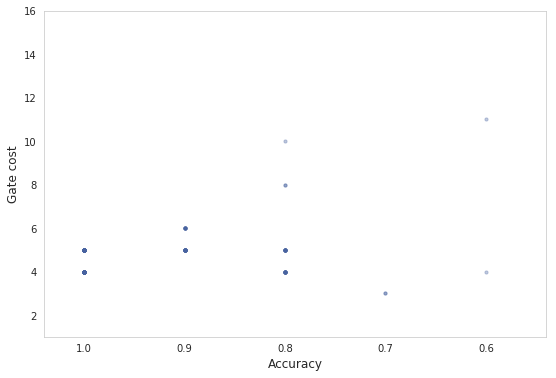

In [10]:
pop, COST, obj_GATE, obj_ACC= [], [], [], []
early_stop, threshold= 0, 100

sns.set_style("whitegrid")
plt.figure(figsize=(9,6))
plt.xlim(1.04,0.54)
plt.ylim(1,GENE*2)
plt.xlabel("Accuracy", fontsize=12)
plt.ylabel("Gate cost", fontsize=12)
plt.grid(False)

    
for i in range(POPULATION):
    genes = np.random.randint(2, size=(GENE,BIT))
    pop.append(genes)
    
start_time = time()
for g in range(GENERATION):
    
    ##### Don't use if you don't have multiple CPU #####
    inputs = range(POPULATION)
    process_list= []

    q_list = [Queue() for i in range(len(inputs))]
    RESULt = []

    for i in inputs:
        process_list.append(mp.Process(target = task, args = (i, pop,  q_list[i], MODE)))
        process_list[-1].start()

    for i in inputs:
        process_list[i].join()

    for q in q_list:
        RESULt.append(q.get())
    
    end_time = time()

    FITNESS, SCORE, QC_R, QC_H, QC_CNOT, QC_SWAP, plt_acc, plt_gate = [], [], [], [], [], [], [], []
    cost_pool ,obj_gate, obj_acc = 0, 0, 0

    for i in range(POPULATION):
        SCORE.append(round(RESULt[i][0],2))
        QC_R.append(RESULt[i][1])
        QC_H.append(RESULt[i][2])
        QC_CNOT.append(RESULt[i][3])
        
    for i in range(POPULATION):
        fit = cost_func(SCORE[i], QC_R[i], QC_H[i], QC_CNOT[i])
        FITNESS.append(fit)            
    ##### Don't use if you don't have multiple CPU #####
    ##### Run line below instead
    
    # SCORE, FITNESS = calculate_fitness(pop, POPULATION, train_x, train_y, test_x, test_y)
    
    for i in range(POOLSIZE):
        cost_p = FITNESS[i]
        obj_g = cost_gate(QC_R[i], QC_H[i], QC_CNOT[i])
        obj_a = SCORE[i]
        
        plt_gate.append(obj_g)
        plt_acc.append(obj_a)
        cost_pool += cost_p
        obj_gate += obj_g
        obj_acc += obj_a
     
    if cost_pool/POOLSIZE < threshold:
        threshold = cost_pool/POOLSIZE
        early_stop = 0    
    early_stop += 1
    
    COST.append(cost_pool/POOLSIZE)
    obj_GATE.append(obj_gate/POOLSIZE)
    obj_ACC.append(obj_acc/POOLSIZE)
    plt.scatter(plt_acc, plt_gate, s=10, c="#4863A0", alpha=(g+GENERATION/2)/(1.5*GENERATION))
    
    print("\nGeneration:", g+1,", Cost:", round(COST[g],2) ,", Time:", round(end_time-start_time,2),"s")
    print("Accuracy:", SCORE)
    print("Fitness:", FITNESS)

    if g == GENERATION: break
    if early_stop == EARLYSTOP: break

    parents = []

    for i in range(POOLSIZE):
        FitnessIndex = np.where(FITNESS == min(FITNESS))
        parents.append(pop[FitnessIndex[0][0]])
        del FITNESS[FitnessIndex[0][0]]
        del pop[FitnessIndex[0][0]]

    for i in range(OFFSPRINGSIZE):
        ll,rr = np.random.randint(POOLSIZE), np.random.randint(POOLSIZE) 
        parent_left, parent_right = parents[ll], parents[rr]
        cross_point = np.random.randint(GENE-1) 
        offspring = np.concatenate((parent_left[:cross_point],parent_right[cross_point:]), axis=0)

        for ii in range(PROB):
            mutation_index = np.random.randint(GENE) 
            mutation_bit = np.random.randint(BIT) 
            offspring[mutation_index][mutation_bit] = (offspring[mutation_index][mutation_bit]+1)%2

        parents.append(offspring)       
    pop = parents    
plt.show()

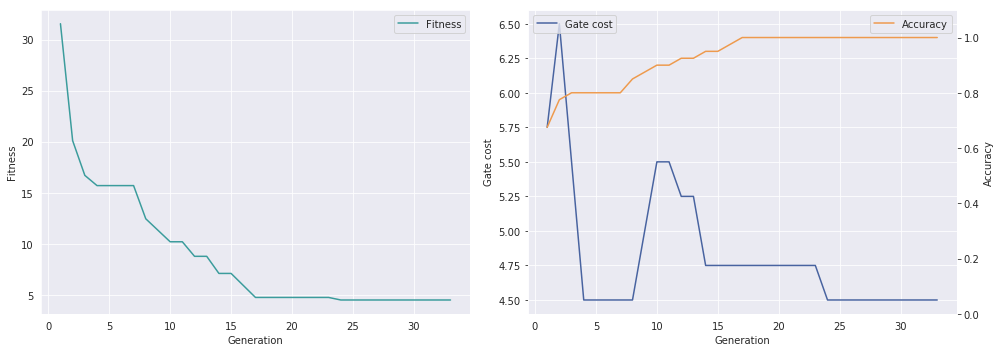

In [11]:
sns.set_style("darkgrid")
obj_x, obj_y1, obj_y2 = np.arange(len(obj_ACC)), np.array(obj_GATE), np.array(obj_ACC)
cost_x, cost_y = np.arange(len(obj_GATE)), np.array(COST)

fig, axes = plt.subplots(1,2, figsize=(14,5))

ax1=axes[1]
ax1.set_xlabel('Generation')
ax1.set_ylabel('Gate cost')
ax1.plot(obj_x+1, obj_y1, label="Gate cost", color="#4863A0")
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 
ax2.set_ylabel('Accuracy')
ax2.plot(obj_x+1, obj_y2, label="Accuracy", color="#EE9A4D")
ax2.grid(False)
ax2.tick_params(axis='y')
ax2.set_ylim(0, 1.1)

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

ax3=axes[0]
ax3.set_xlabel('Generation')
ax3.set_ylabel('Fitness')
ax3.plot(cost_x+1, cost_y, label="Fitness", color="#3B9C9C")
ax3.tick_params(axis='y')
ax3.legend(loc = "uppper right")

fig.tight_layout() 
plt.show()

#### Results

R gate: 4 
H gate: 0 
CNOT gate: 0


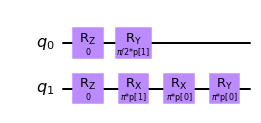

In [12]:
DISPLAY = 1
qc_display, r_display, h_display, cnot_display = generate_circuit_2local(pop[DISPLAY-1], QUBIT, FEATURE)
print("R gate:",r_display,"\nH gate:",h_display,"\nCNOT gate:",cnot_display)
qc_display.draw(output="mpl")

In [13]:
ga_kernel = QuantumKernel(feature_map=qc_display, quantum_instance=quantum_instance,)
model_ga = SVC(kernel=ga_kernel.evaluate)
qsvm = model_ga.fit(train_x, train_y)
q_score = model_ga.score(test_x, test_y)

print(f'Test kernel acc: {q_score}')

Test kernel acc: 1.0


#### Compare kernels

In [14]:
GRID = 0.04

def make_meshgrid(x, y, h=0.004):
    xx, yy = np.meshgrid(np.arange(-1.04, 1.04+0.004, h), np.arange(-1.04, 1.04+0.004, h))
    return xx, yy

sns.set_style("whitegrid")
def make_big_meshgrid(x, y, h=GRID): 
    xx, yy = np.meshgrid(np.arange(-1.04, 1.04+GRID, h), np.arange(-1.04, 1.04+GRID, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

X0, X1 = X[:, 0], X[:, 1]

xx, yy = make_meshgrid(X0, X1)
bbxx, bbyy = make_big_meshgrid(X0, X1)

meshgrid_features = np.column_stack((xx.ravel(), yy.ravel()))
bbmeshgrid_features = np.column_stack((bbxx.ravel(), bbyy.ravel()))

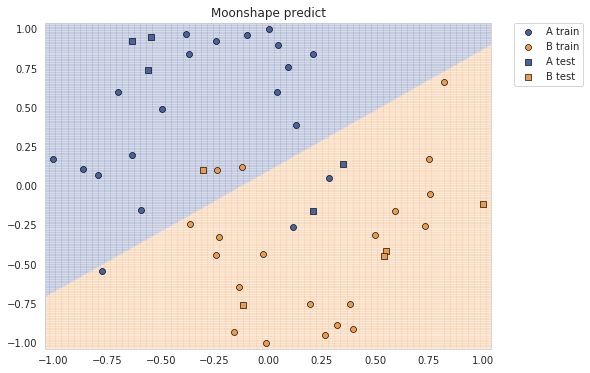

SVM linear test score: 0.7


In [15]:
model_svc = SVC(kernel='linear')
svc_l = model_svc.fit(train_x, train_y)
score = model_svc.score(test_x, test_y)

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#4863A0","#EE9A4D"])
meshgrid_colors = svc_l.predict(meshgrid_features)

plt.figure(figsize=(8,6))
meshgrid_colors = meshgrid_colors.reshape(xx.shape)
plt.pcolormesh(xx, yy, meshgrid_colors, cmap=cmap, alpha=0.06)

plt.scatter(
    train_x[np.where(train_y[:] == 0), 0], train_x[np.where(train_y[:] == 0), 1],
    marker="o", color="#4863A0", edgecolors="k", linewidths=0.64, label="A train")

plt.scatter(
    train_x[np.where(train_y[:] == 1), 0], train_x[np.where(train_y[:] == 1), 1],
    marker="o", color="#EE9A4D", edgecolors="k", linewidths=0.64, label="B train")

plt.scatter(
    test_x[np.where(test_y[:] == 0), 0], test_x[np.where(test_y[:] == 0), 1],
    marker="s", color="#4863A0", edgecolors="k", linewidths=0.64, label="A test")

plt.scatter(
    test_x[np.where(test_y[:] == 1), 0], test_x[np.where(test_y[:] == 1), 1],
    marker="s", color="#EE9A4D", edgecolors="k", linewidths=0.64, label="B test")

plt.legend(bbox_to_anchor=(1.05,1), loc="upper left", borderaxespad=0.0)
plt.title("Moonshape predict")
plt.grid(False)
plt.show()

print(f'SVM linear test score: {score}')

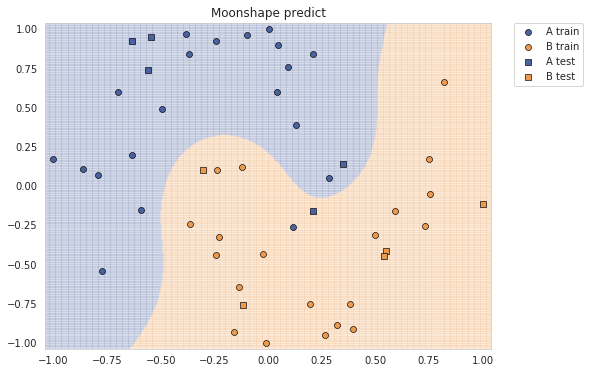

SVM Gaussian test score: 0.9


In [16]:
model_svc = SVC(kernel='rbf',gamma=5)
svc_p = model_svc.fit(train_x, train_y)
score = model_svc.score(test_x, test_y)

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#4863A0","#EE9A4D"])
meshgrid_colors = svc_p.predict(meshgrid_features)

plt.figure(figsize=(8,6))
meshgrid_colors = meshgrid_colors.reshape(xx.shape)
plt.pcolormesh(xx, yy, meshgrid_colors, cmap=cmap, alpha=0.06)

plt.scatter(
    train_x[np.where(train_y[:] == 0), 0], train_x[np.where(train_y[:] == 0), 1],
    marker="o", color="#4863A0", edgecolors="k", linewidths=0.64, label="A train")

plt.scatter(
    train_x[np.where(train_y[:] == 1), 0], train_x[np.where(train_y[:] == 1), 1],
    marker="o", color="#EE9A4D", edgecolors="k", linewidths=0.64, label="B train")

plt.scatter(
    test_x[np.where(test_y[:] == 0), 0], test_x[np.where(test_y[:] == 0), 1],
    marker="s", color="#4863A0", edgecolors="k", linewidths=0.64, label="A test")

plt.scatter(
    test_x[np.where(test_y[:] == 1), 0], test_x[np.where(test_y[:] == 1), 1],
    marker="s", color="#EE9A4D", edgecolors="k", linewidths=0.64, label="B test")

plt.legend(bbox_to_anchor=(1.05,1), loc="upper left", borderaxespad=0.0)
plt.title("Moonshape predict")
plt.grid(False)
plt.show()

print(f'SVM Gaussian test score: {score}')

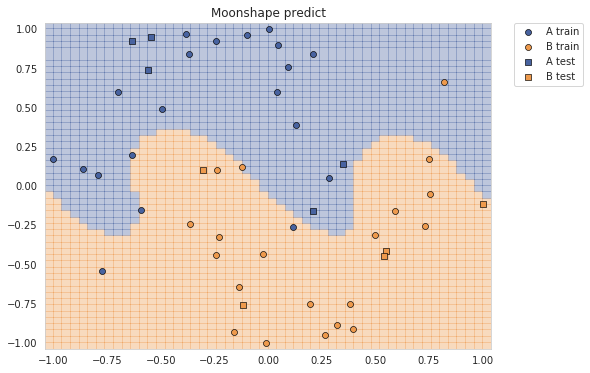

QSVM test score: 1.0
Cost time: 16.010835 s


In [17]:
X0, X1 = train_x[:, 0], train_x[:, 1]
bbxx, bbyy = make_big_meshgrid(X0, X1)
bbmeshgrid_features = np.column_stack((bbxx.ravel(), bbyy.ravel()))

meshgrid_time1 = time()

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#4863A0","#EE9A4D"])
meshgrid_colors = qsvm.predict(bbmeshgrid_features)

plt.figure(figsize=(8,6))
plt.ylim(-1.04, 1.04)
plt.xlim(-1.04, 1.04)
meshgrid_colors = meshgrid_colors.reshape(bbxx.shape)
plt.pcolormesh(bbxx, bbyy, meshgrid_colors, cmap=cmap, alpha=0.36)

plt.scatter(
    train_x[np.where(train_y[:] == 0), 0], train_x[np.where(train_y[:] == 0), 1],
    marker="o", color="#4863A0", edgecolors="k", linewidths=0.64, label="A train")

plt.scatter(
    train_x[np.where(train_y[:] == 1), 0], train_x[np.where(train_y[:] == 1), 1],
    marker="o", color="#EE9A4D", edgecolors="k", linewidths=0.64, label="B train")

plt.scatter(
    test_x[np.where(test_y[:] == 0), 0], test_x[np.where(test_y[:] == 0), 1],
    marker="s", color="#4863A0", edgecolors="k", linewidths=0.64, label="A test")

plt.scatter(
    test_x[np.where(test_y[:] == 1), 0], test_x[np.where(test_y[:] == 1), 1],
    marker="s", color="#EE9A4D", edgecolors="k", linewidths=0.64, label="B test")

plt.legend(bbox_to_anchor=(1.05,1), loc="upper left", borderaxespad=0.0)
plt.title("Moonshape predict")
plt.grid(False)
plt.show()

print(f'QSVM test score: {q_score}')

meshgrid_time2 = time()
print("Cost time: {:3f} s".format(meshgrid_time2-meshgrid_time1))